In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
import numpy as np
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

In [2]:
df = pd.read_csv('D:\FYP2\studentdataset.csv')

In [3]:
df.head()

,guardianEncode,romanticEncode,internetEncode,higherEncode,nurseryEncode,activitiesEncode,paidEncode,famsupEncode,schoolsupEncode,reasonEncode,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Target
0,1,1,1,0,0,1,1,1,0,1,...,3,4,1,1,3,4,0,11,11,7.333333
1,0,1,0,0,1,1,1,0,1,1,...,3,3,1,1,3,2,9,11,11,10.333333
2,1,1,0,0,0,1,1,1,0,3,...,3,2,2,3,3,6,12,13,12,12.333333
3,1,0,0,0,0,0,1,0,1,0,...,2,2,1,1,5,0,14,14,14,14.000000
4,0,1,1,0,0,1,1,0,1,0,...,3,2,1,2,5,0,11,13,13,12.333333


In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
len(df)

In [ ]:
df.info()

In [ ]:
df['sexEncode']

# Data Understanding

In [ ]:
df.mean()

# Data Visualization

In [ ]:
plt.subplots(figsize=(8,12))
grade_counts = df['G3'].value_counts().sort_values().plot.barh(width=.9,color=sns.color_palette('inferno',40))
grade_counts.axes.set_title('Number of students who scored a particular grade',fontsize=30)
grade_counts.set_xlabel('Number of students', fontsize=30)
grade_counts.set_ylabel('Final Grade', fontsize=30)
plt.show()

In [ ]:
b = sns.countplot(df['G3'])
b.axes.set_title('Distribution of Final grade of students', fontsize = 30)
b.set_xlabel('Final Grade', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

In [ ]:
male_studs = len(df[df['sexEncode'] == 0])
female_studs = len(df[df['sexEncode'] == 1])
print('Number of male students:',male_studs)
print('Number of female students:',female_studs)

In [ ]:
b = sns.kdeplot(df['age'], shade=True)
b.axes.set_title('Ages of students', fontsize = 30)
b.set_xlabel('Age', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

In [ ]:
x = df['age']

plt.hist(x)
plt.show() 

In [ ]:
b = sns.countplot('age',hue='sexEncode', data=df)
b.axes.set_title('Number of students in different age groups',fontsize=30)
b.set_xlabel("Age",fontsize=30)
b.set_ylabel("Count",fontsize=20)
plt.show()

In [ ]:
# Grade distribution by address
sns.kdeplot(df.loc[df['higherEncode'] == 0, 'G3'], label='Urban', shade = True)
sns.kdeplot(df.loc[df['higherEncode'] == 1, 'G3'], label='Rural', shade = True)
plt.title('Do urban students score higher than rural students?', fontsize = 20)
plt.xlabel('Grade', fontsize = 20);
plt.ylabel('Density', fontsize = 20)
plt.show()

In [ ]:
correlation = df.corr()

del df['G1']
del df['G2']
del df['G3']

In [ ]:
correlation['G3'].sort_values(ascending=False)

In [ ]:
corr = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True)

In [ ]:
df.isnull().any()

In [ ]:
df.corr()

In [ ]:
sns.catplot('schoolEncode',data=df,kind='count')

In [ ]:
sns.barplot(df['age'],df['failures'],hue=df['sexEncode'],palette='viridis')

In [ ]:
df.skew().sort_values(ascending=False)

In [ ]:
x = df['health']

plt.hist(x)
plt.show()

In [ ]:


df.hist()

plot.show()

# Handle Skewness

In [ ]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

cols1 = ["absences", "failures", "Dalc"]
def test_transformers(columns):
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    fig = plt.figure(figsize=(20,30))
    j = 1
    for i in columns:
        array = np.array(df[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        plt.subplot(3,3,j)
        sns.histplot(array, bins = 50, kde = True)
        plt.title(f"Original Distribution for {i}")
        plt.subplot(3,3,j+1)
        sns.histplot(x, bins = 50, kde = True)
        plt.title(f"Quantile Transform for {i}")
        plt.subplot(3,3,j+2)
        sns.histplot(y, bins = 50, kde = True)
        plt.title(f"Power Transform for {i}")
        j += 3
        


In [ ]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

cols1 = ["traveltime","Walc","age"]
def test_transformers(columns):
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    fig = plt.figure(figsize=(20,30))
    j = 1
    for i in columns:
        array = np.array(df[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        plt.subplot(3,3,j)
        sns.histplot(array, bins = 50, kde = True)
        plt.title(f"Original Distribution for {i}")
        plt.subplot(3,3,j+1)
        sns.histplot(x, bins = 50, kde = True)
        plt.title(f"Quantile Transform for {i}")
        plt.subplot(3,3,j+2)
        sns.histplot(y, bins = 50, kde = True)
        plt.title(f"Power Transform for {i}")
        j += 3
        


In [ ]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

cols1 = ["FjobEncode","famrel","MjobEncode"]
def test_transformers(columns):
    pt = PowerTransformer()
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    fig = plt.figure(figsize=(20,30))
    j = 1
    for i in columns:
        array = np.array(df[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = qt.fit_transform(array)
        plt.subplot(3,3,j)
        sns.histplot(array, bins = 50, kde = True)
        plt.title(f"Original Distribution for {i}")
        plt.subplot(3,3,j+1)
        sns.histplot(x, bins = 50, kde = True)
        plt.title(f"Quantile Transform for {i}")
        plt.subplot(3,3,j+2)
        sns.histplot(y, bins = 50, kde = True)
        plt.title(f"Power Transform for {i}")
        j += 3
        

In [ ]:
test_transformers(cols1)

In [ ]:
#Using mpg data
#Quantile Transformation (by default it is Uniform)
quantile_transformer = QuantileTransformer(random_state=0,  output_distribution='normal')
df['absences_trans'] = pd.Series(quantile_transformer.fit_transform(np.array(df['absences']).reshape(-1, 1))[:,0])
df[['absences', 'absences_trans']].head()
#"failures", "Dalc"
quantile_transformer = QuantileTransformer(random_state=0,  output_distribution='normal')
df['failures_trans'] = pd.Series(quantile_transformer.fit_transform(np.array(df['failures']).reshape(-1, 1))[:,0])
df[['failures', 'failures_trans']].head()


#"traveltime","Walc","age"
quantile_transformer = QuantileTransformer(random_state=0,  output_distribution='normal')
df['traveltime_trans'] = pd.Series(quantile_transformer.fit_transform(np.array(df['traveltime']).reshape(-1, 1))[:,0])
df[['traveltime', 'traveltime']].head()

quantile_transformer = QuantileTransformer(random_state=0,  output_distribution='normal')
df['Walc_trans'] = pd.Series(quantile_transformer.fit_transform(np.array(df['Walc']).reshape(-1, 1))[:,0])
df[['Walc', 'Walc_trans']].head()

quantile_transformer = QuantileTransformer(random_state=0,  output_distribution='normal')
df['age_trans'] = pd.Series(quantile_transformer.fit_transform(np.array(df['age']).reshape(-1, 1))[:,0])
df[['age', 'age_trans']].head()

In [ ]:
df['absences_trans']

In [ ]:
df.head()

In [ ]:
del df['absences']
del df['failures']
del df['traveltime']
del df['Walc']
del df['age']

In [ ]:
# Log transform a single column 
df[‘col1’] = np.log(df[‘col1’] 

# Log transform multiple columns in dataframe 
df = df[[‘col1', ‘col2']].apply(lambda x: np.log(x))

# Treating Outliers

In [ ]:
df.describe()

In [ ]:
sns.boxplot(df['absences'],data=df)

In [ ]:
Q1 = df['absences'].quantile(0.25)
Q3 = df['absences'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
I=Q3 + (whisker_width*IQR)

df["absences"] = df["absences"].mask(df["absences"] >I,  df['absences'].median())

#  Handle Imbalanced data

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

In [ ]:
del df['higherEncode']
del df['schoolsupEncode']
del df['PstatusEncode']


In [ ]:
# class count
class_count_0, class_count_1 = df['schoolsupEncode'].value_counts()

# Separate class
class_0 = df[df['schoolsupEncode'] == 1]
class_1 = df[df['schoolsupEncode'] == 0]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

In [ ]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over,class_0], axis=0)

print("total class of 1 and 0:",test_over['schoolsupEncode'].value_counts())# plot the count after under-sampeling
test_over['schoolsupEncode'].value_counts().plot(kind='bar', title='count (schoolsupEncode)')

In [ ]:
# class count
class_count_0, class_count_1 = df['higherEncode'].value_counts()

# Separate class
class_0 = df[df['higherEncode'] == 0]
class_1 = df[df['higherEncode'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

In [ ]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over,class_0], axis=0)

print("total class of 1 and 0:",test_over['higherEncode'].value_counts())# plot the count after under-sampeling
test_over['higherEncode'].value_counts().plot(kind='bar', title='count (higherEncode)')

In [ ]:
# class count
class_count_0, class_count_1 = df['PstatusEncode'].value_counts()

# Separate class
class_0 = df[df['PstatusEncode'] == 1]
class_1 = df[df['PstatusEncode'] == 0]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

In [ ]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over,class_0], axis=0)

print("total class of 1 and 0:",test_over['PstatusEncode'].value_counts())# plot the count after under-sampeling
test_over['PstatusEncode'].value_counts().plot(kind='bar', title='count (PstatusEncode)')

In [ ]:
# class count
class_count_0, class_count_1 = df['internetEncode'].value_counts()

# Separate class
class_0 = df[df['internetEncode'] == 0]
class_1 = df[df['internetEncode'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

In [ ]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over,class_0], axis=0)

print("total class of 1 and 0:",test_over['internetEncode'].value_counts())# plot the count after under-sampeling
test_over['internetEncode'].value_counts().plot(kind='bar', title='count (internetEncode)')

In [ ]:
test_over.info()

In [ ]:
df=test_over

In [ ]:
df.info()

# Split Data

In [4]:
del df['Target']

In [5]:
# Output
X =pd.DataFrame(df.drop(df.columns[-1],axis=1))
Y=df['G3']
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=20,shuffle=True)

In [ ]:
#independent Variable
X = df[['studytime','failures', 'absences', 'G1', 'G2']]
Y=df['G3']
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=20,shuffle=True)

In [ ]:
X= df[['famrel',  
'romanticEncode', 
'Fedu',       
'Medu',           
'studytime',  
'G1',         
'G2',
'failures',
'higherEncode',
'age',
'guardianEncode', 
'schoolEncode',
'Dalc']]
Y=df['G3']
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=20,shuffle=True)

In [ ]:
X.info()

# Feature Selection

In [12]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

In [13]:
importances = df.drop("G3", axis=1).apply(lambda x: x.corr(df.G3))
indices = np.argsort(importances)
print(importances[indices])

failures           -0.383145
higherEncode       -0.236578
Dalc               -0.129642
schoolEncode       -0.127114
age                -0.125282
addressEncode      -0.117696
Walc               -0.115740
internetEncode     -0.107064
traveltime         -0.102627
goout              -0.097877
health             -0.080079
guardianEncode     -0.077320
FjobEncode         -0.071819
freetime           -0.064890
absences           -0.045671
MjobEncode         -0.040500
nurseryEncode      -0.039950
activitiesEncode   -0.033998
PstatusEncode      -0.030693
famsupEncode       -0.013313
reasonEncode        0.025557
sexEncode           0.031472
paidEncode          0.049388
famrel              0.054461
famsizeEncode       0.061209
schoolsupEncode     0.079346
romanticEncode      0.098363
Fedu                0.159796
studytime           0.161629
Medu                0.201472
G1                  0.809142
G2                  0.910743
dtype: float64


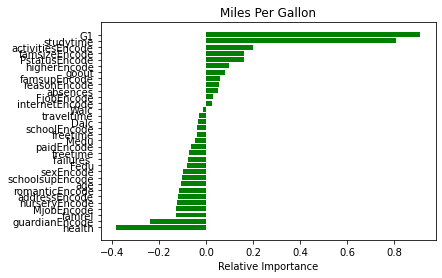

<Figure size 14400x14400 with 0 Axes>

In [14]:
names=['failures ','higherEncode','age',
'guardianEncode',
'schoolEncode',
'Dalc',
'absences',
'Walc', 
'goout',
'internetEncode',
'freetime',
'freetime',          
'traveltime', 
'famsupEncode',
'addressEncode',
'FjobEncode',  
'MjobEncode',
'nurseryEncode',
'activitiesEncode', 
'PstatusEncode', 
'schoolsupEncode',
'famsizeEncode',
'health',       
'reasonEncode',    
'paidEncode',   
'sexEncode',      
'famrel',           
'romanticEncode',  
'Fedu',           
'Medu',            
'studytime',    
'G1',                
'G2']
plt.title('Miles Per Gallon')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.figure(figsize=(200,200))
plt.show()

In [15]:
X= df[['famrel',  
'romanticEncode', 
'Fedu',       
'Medu',           
'studytime',  
'G1',         
'G2',
'failures',
'higherEncode',
'age',
'guardianEncode', 
'schoolEncode',
'Dalc']]

In [16]:
X.head()

,famrel,romanticEncode,Fedu,Medu,studytime,G1,G2,failures,higherEncode,age,guardianEncode,schoolEncode,Dalc
0,4,1,4,4,2,0,11,0,0,18,1,0,1
1,5,1,1,1,2,9,11,0,0,17,0,0,1
2,4,1,1,1,2,12,13,0,0,15,1,0,2
3,3,0,2,4,3,14,14,0,0,15,1,0,1
4,4,1,3,3,2,11,13,0,0,16,0,0,1


In [17]:
for i in range(0,len(X.columns)):
    for j in  range(0,len(X.columns)):
        if i!=j:
            corr_1=np.abs(X[X.columns[i]].corr(X[X.columns[j]]))
            if corr_1 <0.3:
                print( X.columns[i] , " is not correlated  with ", X.columns[j])
            elif corr_1>0.75:
                print( X.columns[i] , " is highly  correlated  with ", X.columns[j])

famrel  is not correlated  with  romanticEncode
famrel  is not correlated  with  Fedu
famrel  is not correlated  with  Medu
famrel  is not correlated  with  studytime
famrel  is not correlated  with  G1
famrel  is not correlated  with  G2
famrel  is not correlated  with  failures
famrel  is not correlated  with  higherEncode
famrel  is not correlated  with  age
famrel  is not correlated  with  guardianEncode
famrel  is not correlated  with  schoolEncode
famrel  is not correlated  with  Dalc
romanticEncode  is not correlated  with  famrel
romanticEncode  is not correlated  with  Fedu
romanticEncode  is not correlated  with  Medu
romanticEncode  is not correlated  with  studytime
romanticEncode  is not correlated  with  G1
romanticEncode  is not correlated  with  G2
romanticEncode  is not correlated  with  failures
romanticEncode  is not correlated  with  higherEncode
romanticEncode  is not correlated  with  age
romanticEncode  is not correlated  with  guardianEncode
romanticEncode  is n

In [18]:
import numpy as np
outliers = []
def detect_outliers_zscore(df):
    thres = 3
    mean = np.mean(df)
    std = np.std(df)
    # print(mean, std)
    for i in df:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(df)
print("Outliers from Z-scores method: ", sample_outliers)

C:\Users\See\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('<U14'), dtype('float64')) -> None

In [ ]:
import numpy as np
outliers = []
def detect_outliers_zscore(df):
    thres = 3
    mean = np.mean(df)
    std = np.std(df)
    # print(mean, std)
    for i in df:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(df)
print("Outliers from Z-scores method: ", sample_outliers)

# Feature Scaling

In [6]:
X_train.head()

,guardianEncode,romanticEncode,internetEncode,higherEncode,nurseryEncode,activitiesEncode,paidEncode,famsupEncode,schoolsupEncode,reasonEncode,...,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
947,0,1,0,0,0,1,0,0,1,2,...,0,4,3,3,1,1,3,0,14,13
520,1,1,0,0,0,1,1,0,1,3,...,0,4,3,2,1,3,5,6,6,8
165,2,0,0,0,0,0,0,0,1,2,...,0,4,2,1,2,3,3,2,13,13
1035,1,0,0,0,0,0,0,0,1,2,...,0,4,4,3,2,2,5,7,6,5
7,1,1,1,0,0,1,1,0,0,0,...,0,4,1,4,1,1,1,2,10,13


In [7]:
cols = X.columns

In [8]:
Y=df['G3']
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=20,shuffle=True)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [10]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [11]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.head()

# Build Model

In [19]:
from sklearn import metrics
model = LinearRegression()
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print(f'Accuracy: {round(r2_score(Y_test , pred),3)*100}%')

Mean Absolute Error: 1.0555398607708417
Mean Squared Error: 3.2389427922606577
Root Mean Squared Error: 1.7997063072236696
Accuracy: 81.8%


C:\Users\See\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\See\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='G3'>

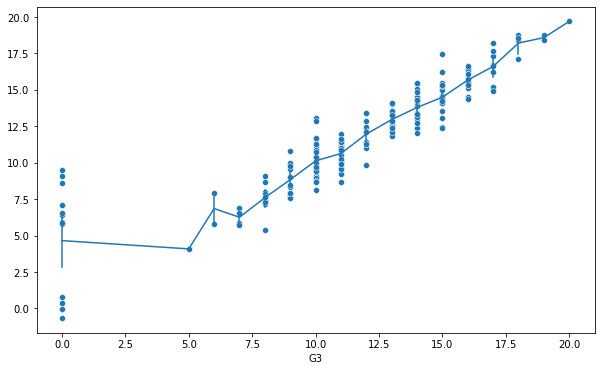

In [20]:
plt.figure(figsize= (10,6))
sns.lineplot(Y_test,pred, err_style="bars")
sns.scatterplot(Y_test, pred)

C:\Users\See\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


MSE 3.2389427922606577
R2 Score: 0.8177871507094571


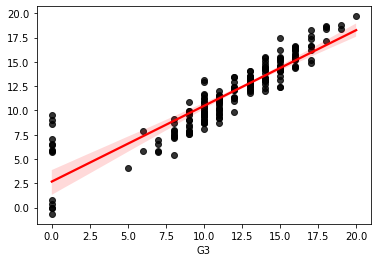

In [21]:
sns.regplot(Y_test,pred,scatter_kws={"color": "black"}, line_kws={"color": "red"})

from sklearn import metrics
from sklearn.metrics import r2_score

print('MSE', metrics.mean_squared_error(Y_test,pred))
print('R2 Score:',r2_score(Y_test , pred))

In [22]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, Y_train, Y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']

    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=100)
    model4 = ExtraTreesRegressor(n_estimators=100)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=50)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse','rscore'], index = model_name_list)
     # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - Y_test))
        rmse = np.sqrt(np.mean((predictions - Y_test) ** 2))
        rscore= round(r2_score(Y_test , predictions),3)*100
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse, rscore]
    
    # Median Value Baseline Metrics
    baseline = np.median(Y_train)
    baseline_mae = np.mean(abs(baseline - Y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - Y_test) ** 2))
    baseline_rscore = round(r2_score(Y_test , predictions),3)*100
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse,baseline_rscore]
    
    return results

In [23]:
results = evaluate(X_train, X_test, Y_train, Y_test)
results

,mae,rmse,rscore
Linear Regression,1.05554,1.799706,81.8
ElasticNet Regression,1.476343,2.357487,68.7
Random Forest,1.063162,1.711411,83.5
Extra Trees,1.12201,1.905052,79.6
SVM,1.299479,2.284292,70.6
Gradient Boosted,0.974117,1.608967,85.4
Baseline,3.196172,4.255028,85.4


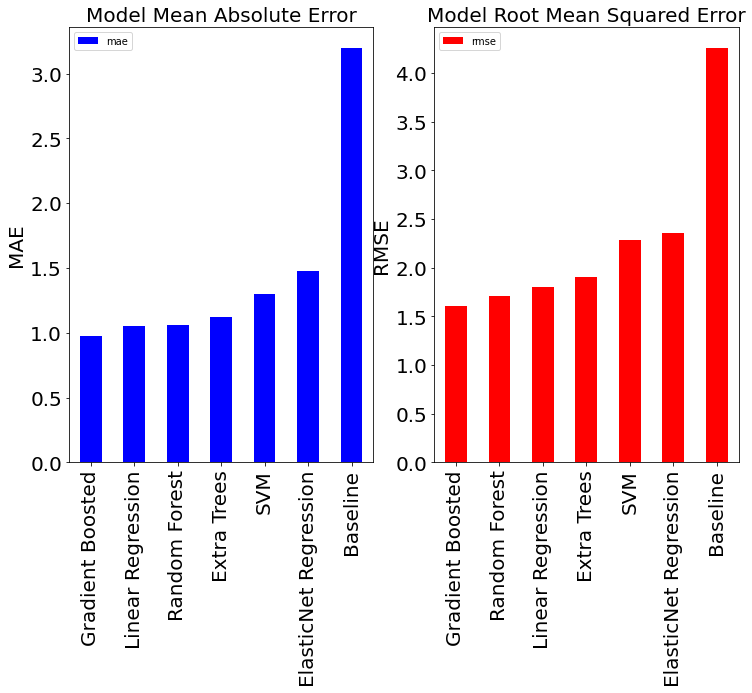

In [24]:
plt.figure(figsize=(12, 8))

# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax, fontsize=20)
plt.title('Model Mean Absolute Error', fontsize=20) 
plt.ylabel('MAE', fontsize=20)

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax, fontsize=20)
plt.title('Model Root Mean Squared Error', fontsize=20) 
plt.ylabel('RMSE',fontsize=20)


plt.show()

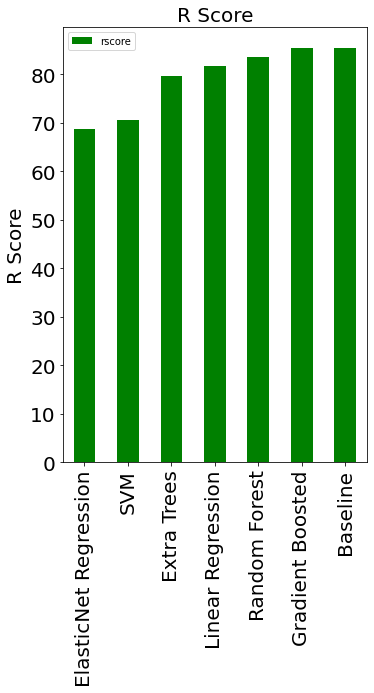

In [25]:
plt.figure(figsize=(12, 8))

ax = plt.subplot(1, 2, 1)
results.sort_values('rscore', ascending = True).plot.bar(y = 'rscore', color = 'g', ax = ax, fontsize=20)
plt.title('R Score', fontsize=20) 
plt.ylabel('R Score',fontsize=20)

plt.show()

# Build Classification

In [26]:
df.loc[df.G3 <= 9, 'G3'] = 0
df.loc[df.G3 > 9, 'G3'] = 1
df.loc[df.G2 <= 9, 'G2'] = 0
df.loc[df.G2 > 9, 'G2'] = 1
df.loc[df.G1 <= 9, 'G1'] = 0
df.loc[df.G1 > 9, 'G1'] = 1

In [ ]:
X = df[['studytime','failures', 'absences', 'G1', 'G2']]
y = df['G3']

In [ ]:
y = Y

In [ ]:
X_train.head()

In [ ]:
X_train['freetime'].describe

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train.head()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
#FIT the classifier to the data
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)

y_pred

In [ ]:
knn.score(X_test, y_test)


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

print(accuracy_score(y_test,y_pred))

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(cm)
print(accuracy_score(y_test,y_pred))

In [ ]:
def detect_outlier(df):

  flag_outlier = False

  for feature in df:
    column = df['age']
    mean = np.mean(column)
    std = np.std(column)
    z_scores = (column - mean) / std
    outliers = np.abs(z_scores) > 3

    n_outliers = sum(outliers)
    if n_outliers > 0:
      print("{} has {} outliers".format(column, n_outliers))
      flag_outlier = True

    if ~flag_outlier:
      print("The dataset has no outliers.")
    
    return None
  
detect_outlier(X)

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

knn_2 = KNeighborsClassifier()

clf = GridSearchCV(knn_2, hyperparameters, cv=10)

best_model = clf.fit(X,y)

print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [ ]:
k_range = range(1,50)
weight = ['distance','uniform']
metric = ['euclidean','manhattan','minkowski']
algorithm = ['ball_tree','kd_tree']
grid_params = dict(n_neighbors=k_range, weights=weight,metric=metric,algorithm=algorithm)


In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
g_res = gs.fit(X_train, y_train)

In [ ]:
g_res.best_score_

In [ ]:
g_res.best_params_